## Importing Libraries

In [13]:
#General Libraries
import numpy as np
import pandas as pd 

# Machine Learning Libraries
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE

# Data Visualiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')



## Explore Data

In [14]:
#load stroke dataset

data = pd.read_csv("C:/Users/USER/Desktop/kaggle/stroke_data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
#categorical feature value count 
categorical=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in range(len(categorical)):
  print(data[categorical[i]].value_counts())

0    2994
1    2116
Name: gender, dtype: int64
1    3353
0    1757
Name: ever_married, dtype: int64
0    2925
1     819
2     687
3     657
4      22
Name: work_type, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64
1    1892
0    1544
2     885
3     789
Name: smoking_status, dtype: int64


In [17]:
# number of 'other' is very small, converting the value to 'Male'
data['gender']=data['gender'].replace('Other','Male')

In [18]:
# encoding 
data.replace({ 'gender': {'Male':1 ,'Female':0}} ,inplace=True)
data.replace({ 'ever_married': {'No':0 ,'Yes':1}} ,inplace=True)
data.replace({ 'Residence_type': {'Rural':0 ,'Urban':1}} ,inplace=True)
data.replace({ 'smoking_status': {'Unknown':0 ,'never smoked':1,'formerly smoked':2,'smokes':3}} ,inplace=True)
data.replace({ 'work_type': {'Private':0 ,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}} ,inplace=True)

In [19]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
#replacing outlier entries with mean of bmi
data["bmi"] = data["bmi"].apply(lambda x: data.bmi.mean())


In [21]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Visualization

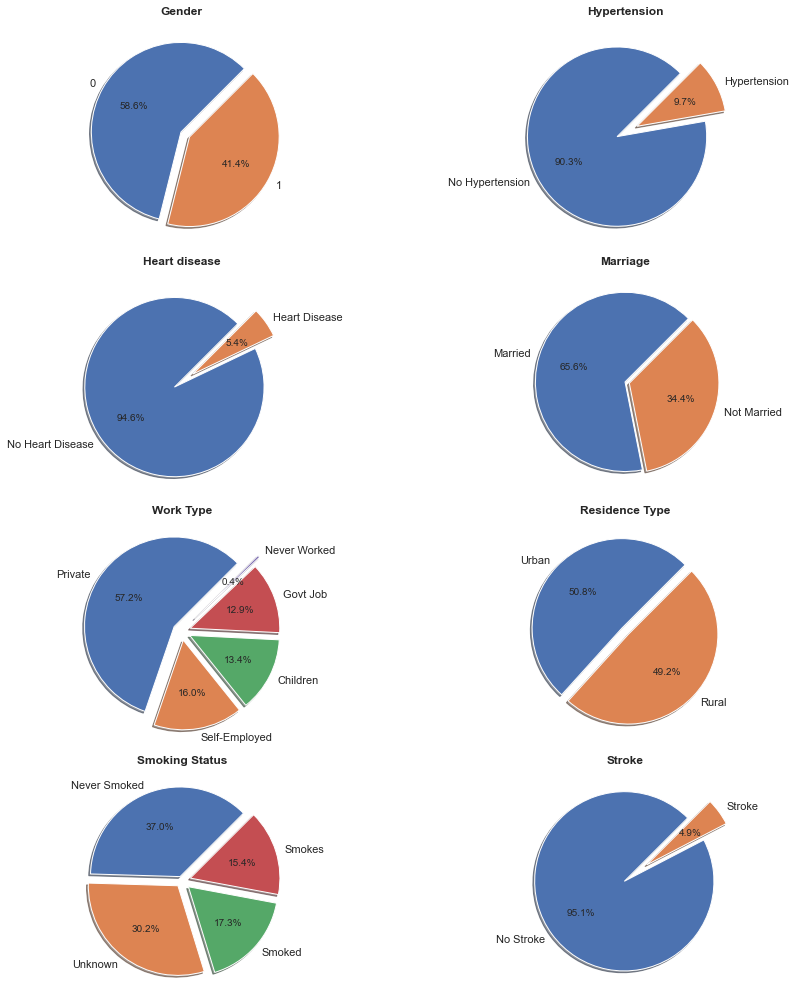

In [22]:
#pie chart
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = data['gender'].value_counts().index.tolist()[:2]
values = data['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = data['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = data['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = data['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = data['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%",shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = data['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = data['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = data['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()


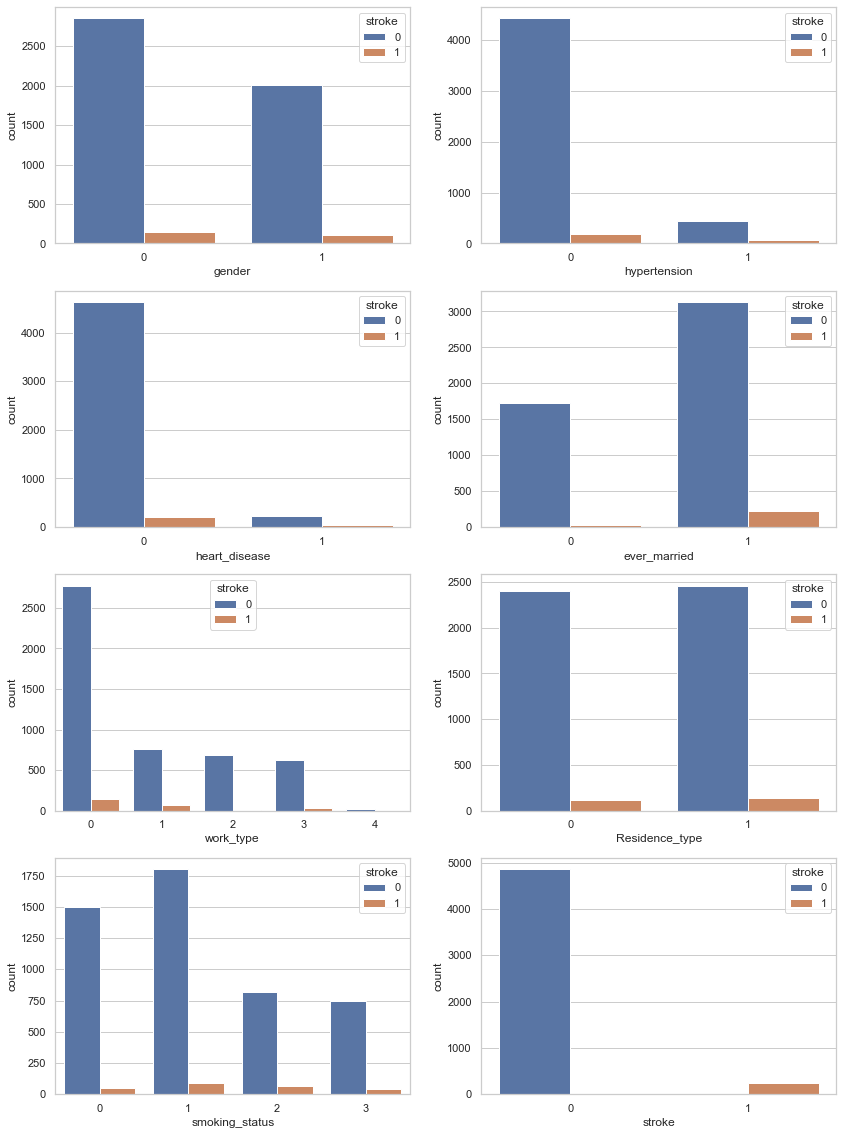

In [23]:
#countplot of each features

data_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(data_st):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'])

<AxesSubplot:title={'center':'Correlation map for variables'}>

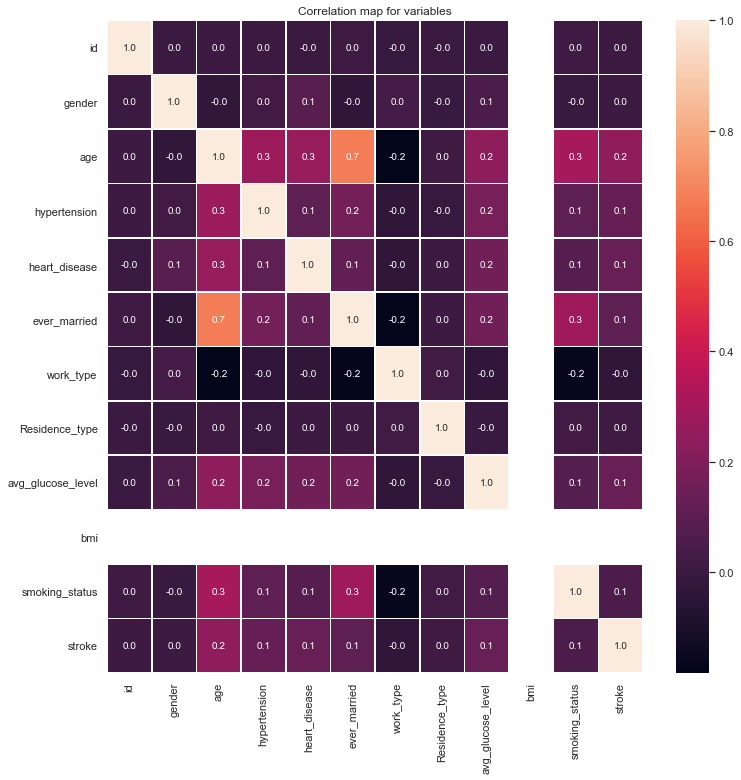

In [119]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax )


## Data split and Training

In [120]:
y = data["stroke"] #Dependent variable
X = data.drop(["stroke"], axis=1) #Independent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
print(y_train.value_counts())

0    3901
1    3901
Name: stroke, dtype: int64


In [121]:
#Define model 
def Model(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,X_test,y_test)
    metrics.plot_roc_curve(model, X_test, y_test)  

Testing Score 
 0.7622309197651663


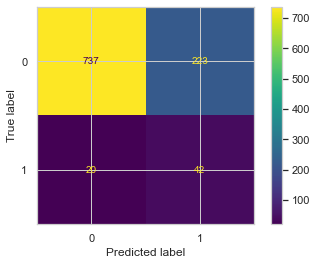

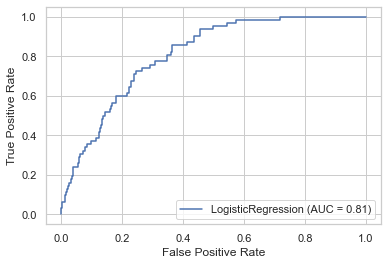

In [122]:
#Logistic Regression
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
Model(lr_model)

Testing Score 
 0.6810176125244618


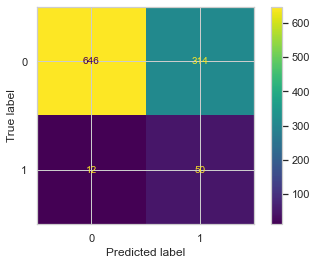

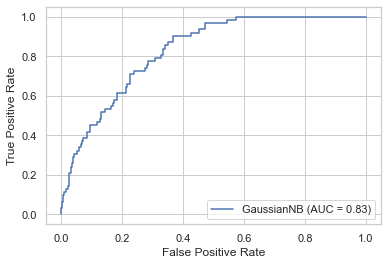

In [123]:
#Gaussian Naive Bayes
gnb = GaussianNB()
GNB_model = gnb.fit(X_train, y_train)
Model(GNB_model)